<a href="https://colab.research.google.com/github/ravinpoudel/PyTorch_Essential_Training_DeepLearning/blob/main/Exercise%20Files/Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Validation

In [1]:
# Setting seeds to try and ensure we have the same results - this is not guaranteed across PyTorch releases.
import torch
torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

import numpy as np
np.random.seed(0)

In [2]:
from torchvision import datasets, transforms
import torch.nn.functional as F
from torch import nn

mean, std = (0.5,), (0.5,)

# Create a transform and normalise data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(mean, std)
                              ])

# Download FMNIST training dataset and load training data
trainset = datasets.FashionMNIST('~/.pytorch/FMNIST/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download FMNIST test dataset and load test data
testset = datasets.FashionMNIST('~/.pytorch/FMNIST/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting /root/.pytorch/FMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/FMNIST/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting /root/.pytorch/FMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/FMNIST/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting /root/.pytorch/FMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/FMNIST/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting /root/.pytorch/FMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/FMNIST/FashionMNIST/raw



In [3]:
class FMNIST(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784, 128)
    self.fc2 = nn.Linear(128,64)
    self.fc3 = nn.Linear(64,10)
    
  def forward(self, x):
    x = x.view(x.shape[0], -1)
    
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    x = F.log_softmax(x, dim=1)
    
    return x

model = FMNIST()

In [4]:
from torch import optim

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

num_epochs = 3

for i in range(num_epochs):
    cum_loss = 0

    for images, labels in trainloader:
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        cum_loss += loss.item()
     
    print(f"Training loss: {cum_loss/len(trainloader)}")

Training loss: 1.034134967621964
Training loss: 0.561660524116142
Training loss: 0.49200392563714146


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

images, labels = next(iter(testloader))

test_image_id = 0 
img = images[test_image_id].view(1, 784) 

with torch.no_grad():
    logps = model(img)

In [6]:
ps = torch.exp(logps)
ps

tensor([[2.4418e-06, 9.3991e-07, 1.3569e-05, 2.6009e-06, 6.9975e-06, 1.0351e-01,
         6.1364e-06, 5.1921e-01, 5.0541e-03, 3.7219e-01]])

In [7]:
nps = ps.numpy()[0]
nps

array([2.4417600e-06, 9.3991474e-07, 1.3568859e-05, 2.6008863e-06,
       6.9975044e-06, 1.0351488e-01, 6.1363830e-06, 5.1920563e-01,
       5.0540916e-03, 3.7219274e-01], dtype=float32)

<BarContainer object of 10 artists>

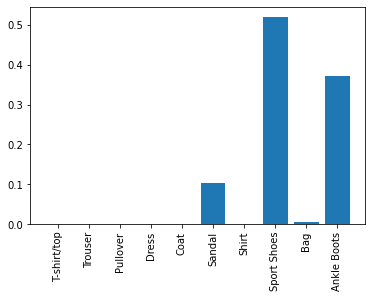

In [8]:
FMNIST_labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sport Shoes','Bag','Ankle Boots']
plt.xticks(np.arange(10),labels=FMNIST_labels,rotation='vertical')
plt.bar(np.arange(10), nps)

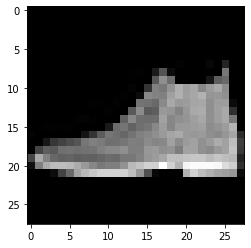

In [9]:
def denormalize(tensor):
  tensor = tensor*0.5 + 0.5
  return tensor
  
img = img.view(28,-1)
img = denormalize(img)
plt.imshow(img,cmap='gray')

In [16]:
with torch.no_grad():
    num_correct = 0
    total = 0

    cnt = 0
    for images, labels in testloader:
        
        logps = model(images)
        output = torch.exp(logps)
        print(output)
        cnt+=1
        
        if cnt > 0:
          break

tensor([[2.4418e-06, 9.3991e-07, 1.3569e-05, 2.6009e-06, 6.9975e-06, 1.0351e-01,
         6.1364e-06, 5.1921e-01, 5.0541e-03, 3.7219e-01],
        [7.1576e-04, 5.5879e-05, 9.5028e-01, 8.8940e-05, 1.4290e-02, 5.8418e-06,
         3.4220e-02, 4.6351e-09, 3.3871e-04, 1.9919e-07],
        [6.1388e-06, 9.9988e-01, 2.1313e-05, 5.8174e-05, 3.0288e-05, 1.0092e-08,
         7.3397e-08, 4.4008e-07, 1.5035e-09, 4.3369e-09],
        [1.7782e-06, 9.9970e-01, 2.7317e-05, 2.4517e-04, 2.3886e-05, 7.7697e-08,
         6.2467e-08, 1.9915e-06, 3.8185e-09, 2.5344e-08],
        [1.2274e-01, 1.4280e-03, 2.5407e-01, 1.6472e-02, 1.6476e-02, 2.6000e-04,
         5.8216e-01, 2.2214e-06, 6.3758e-03, 1.1695e-05],
        [8.2353e-04, 9.9305e-01, 6.4973e-04, 1.4334e-03, 3.9921e-03, 2.5484e-07,
         4.8883e-05, 3.8701e-06, 4.5910e-07, 1.2103e-07],
        [1.3048e-02, 2.5649e-03, 1.0256e-01, 1.2705e-03, 7.5399e-01, 1.3815e-04,
         1.2480e-01, 1.6762e-06, 1.6220e-03, 1.1544e-06],
        [7.0048e-03, 9.3613

In [17]:
with torch.no_grad():
    num_correct = 0
    total = 0

    #set_trace()
    for images, labels in testloader:
        
        logps = model(images)
        output = torch.exp(logps)
        
        pred = torch.argmax(output, 1)
        total += labels.size(0)


In [18]:
pred, labels

(tensor([3, 1, 7, 5, 8, 2, 5, 2, 8, 9, 1, 9, 1, 8, 1, 5]),
 tensor([3, 2, 7, 5, 8, 4, 5, 6, 8, 9, 1, 9, 1, 8, 1, 5]))

In [19]:
pred == labels

tensor([ True, False,  True,  True,  True, False,  True, False,  True,  True,
         True,  True,  True,  True,  True,  True])

In [20]:
with torch.no_grad():
    num_correct = 0
    total = 0

    #set_trace()
    for images, labels in testloader:
        
        logps = model(images)
        output = torch.exp(logps)
        
        pred = torch.argmax(output, 1)
        total += labels.size(0)
        num_correct += (pred == labels).sum().item()

    print(f'Accuracy of the model on the 10000 test images: {num_correct * 100 / total}% ')

Accuracy of the model on the 10000 test images: 81.67% 
